<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Sivert Escaff 
- Nombre de alumno 2: Rodrigo Montecinos

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px
import matplotlib.pyplot as plt

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [3]:
import pandas as pd
import plotly.express as px

# Cargar los datos
data = pd.read_csv('energia_homero.csv')

# Convertimos la columna 
data['date'] = pd.to_datetime(data['date'])

# Visualizar la serie de tiempo del consumo de energía
fig = px.line(data, x='date', y='Energy_kWh', title='Consumo Diario de Energía en la Casa de Homero Simpson')
fig.show()


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.graph_objects as go


# Dividimos el set
train_data = data[data['date'] <= '2020-02-29']
test_data = data[data['date'] >= '2020-03-01']

# preparamos el modelo
train_X = np.array((train_data['date'] - train_data['date'].min()).dt.days).reshape(-1, 1)
train_y = train_data['Energy_kWh']
test_X = np.array((test_data['date'] - train_data['date'].min()).dt.days).reshape(-1, 1)
test_y = test_data['Energy_kWh']

# crear el pipeline
pipeline_trend = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# entrenamos el modelo
pipeline_trend.fit(train_X, train_y)

# predecir los valores
train_preds = pipeline_trend.predict(train_X)
test_preds = pipeline_trend.predict(test_X)

# Calcular el MAE
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(train_y, train_preds)
mae_test = mean_absolute_error(test_y, test_preds)



# graficamos 
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data['date'], y=train_y, mode='lines', name='Valores reales - Entrenamiento'))
fig.add_trace(go.Scatter(x=train_data['date'], y=train_preds, mode='lines', name='Predicciones - Entrenamiento'))
fig.add_trace(go.Scatter(x=test_data['date'], y=test_y, mode='lines', name='Valores reales - Prueba'))
fig.add_trace(go.Scatter(x=test_data['date'], y=test_preds, mode='lines', name='Predicciones - Prueba'))

# configuracion de marcas
fig.update_layout(title='Comparación de las Predicciones del Modelo Lineal y los Valores Reales',
                  xaxis_title='Fecha',
                  yaxis_title='Consumo de Energía kWh',
                  legend_title='Leyenda')

fig.show()




# graficamos los errores
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data['date'], y=train_y - train_preds, mode='lines', name='Error de entrenamiento'))
fig.add_trace(go.Scatter(x=test_data['date'], y=test_y - test_preds, mode='lines', name='Error de prueba'))
fig.update_layout(title='Error de Predicción (Valor real - Valor predicho)', xaxis_title='Fecha', yaxis_title='Error de Energía kWh')
fig.show()

print(f"MAE de entrenamiento: {mae_train}")
print(f"MAE de prueba: {mae_test}")

MAE de entrenamiento: 10.568154088025606
MAE de prueba: 8.655813997873523




3. Al observar el grafico de erro de prediccion, se observa un patron recurrente que nos hace pensar que existe un comportamiento estacional en la serie.Este patron ocurren entre jan de un año hasta el otro.

In [5]:
class FourierFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, period, n_fourier_terms):
        self.period = period
        self.n_fourier_terms = n_fourier_terms
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = np.atleast_2d(np.asarray(X)).reshape(-1)
        results = np.zeros((X.shape[0], 2 * self.n_fourier_terms))
        for i in range(1, self.n_fourier_terms + 1):
            results[:, 2 * (i - 1)] = np.sin(2 * np.pi * i * X / self.period)
            results[:, 2 * (i - 1) + 1] = np.cos(2 * np.pi * i * X / self.period)
        return results


data['days_since_start'] = (data['date'] - data['date'].min()).dt.days

# creamos el pipeline
pipeline_seasonal = Pipeline([
    ('fourier', FourierFeatures(period=365, n_fourier_terms=3)),
    ('linear_regression', LinearRegression())
])

# nos aseguramos de tranf bien
pipeline_seasonal.fit(data[['days_since_start']], data['Energy_kWh'])

#predecir los valores
predictions = pipeline_seasonal.predict(data[['days_since_start']])

# MAE
mae = mean_absolute_error(data['Energy_kWh'], predictions)

# graficamos los errores
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['date'], y=data['Energy_kWh'] - predictions, mode='lines', name='Error'))
fig.update_layout(title='Error de Predicción con Modelo Estacional',
                  xaxis_title='Fecha',
                  yaxis_title='Error de Energía kWh')
fig.show()

print(f"MAE: {mae}")



MAE: 5.310125427445935


6. El grafico muestra que el modelo estacional ha mejorado la predicción del consumo de energía, manteniendo los errores de manera consistentemente mas bajos a lo largo del tiempo. Aunque hay algunos picos de error,podemos mencionar que se captura una buena estacionalidad de los datos.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [6]:
!pip install prophet


In [7]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [8]:
data.rename(columns={'date': 'ds', 'Energy_kWh': 'y'}, inplace=True)

# Dividimos el set
train_data = data[data['ds'] <= '2020-02-29']
test_data = data[data['ds'] >= '2020-03-01']
m = Prophet()
m.fit(train_data)
future = test_data[['ds']]
forecast = m.predict(future)

#predicciones
fig = plot_plotly(m, forecast)
fig.show()

# visulaizar componente
components_fig = plot_components_plotly(m, forecast)
components_fig.show()

train_forecast = forecast.set_index('ds').join(train_data.set_index('ds'))
test_forecast = forecast.set_index('ds').join(test_data.set_index('ds'))

# limpiamos los data para evitar nan
train_forecast.dropna(subset=['y', 'yhat'], inplace=True)
test_forecast.dropna(subset=['y', 'yhat'], inplace=True)


# MAE para el conjunto de prueba
mae_test = mean_absolute_error(test_forecast['y'], test_forecast['yhat'])
print(f"MAE de prueba: {mae_test}")

# Calcular errores de prediccion
test_forecast['error'] = test_forecast['y'] - test_forecast['yhat']

# Graficar los errores de prediccion
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_forecast.index, y=test_forecast['error'], mode='lines', name='Error de Prueba'))
fig.update_layout(title='Error de Predicción (Valor real - Valor predicho)',
                  xaxis_title='Fecha',
                  yaxis_title='Error (kWh)')
fig.show()


22:04:42 - cmdstanpy - INFO - Chain [1] start processing
22:04:42 - cmdstanpy - INFO - Chain [1] done processing


MAE de prueba: 4.9340290480860425




6. Los graficos confirmar que el consumo de energia si varia con las estaciones y los dias de la semana, con una clara estacionalidad.Existen errores en momentos especificos en general el modelo predice bien la tendencia general.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [9]:
# cargamos y preparamos los datos
datos_frink = pd.read_csv('datos_frink.csv')
datos_frink['date'] = pd.to_datetime(datos_frink['date'])
datos_frink = datos_frink[['date', 'Temp_max', 'Temp_min', 'Hum_avg']]
datos_frink.rename(columns={'date': 'ds'}, inplace=True)
data=pd.merge(train_data, datos_frink, on='ds', how='left', suffixes=('', '_frink'))

# unimos los datoss
train_data = pd.merge(train_data, datos_frink, on='ds', how='left', suffixes=('', '_frink'))
test_data = pd.merge(test_data, datos_frink, on='ds', how='left', suffixes=('', '_frink'))

# cremos y ajustamos el modelo
m = Prophet()
m.add_regressor('Temp_max')
m.add_regressor('Temp_min')
m.add_regressor('Hum_avg')

m.fit(train_data)

# preparamos y realizamos 
future = test_data.drop(columns=['y'])
forecast = m.predict(future)

# se grafican los resultados
fig = plot_plotly(m, forecast)
fig.show()

components_fig = plot_components_plotly(m, forecast)
components_fig.show()






22:04:43 - cmdstanpy - INFO - Chain [1] start processing
22:04:43 - cmdstanpy - INFO - Chain [1] done processing



5. se ve un comportamiento estacional en la serie y las condiciones climaticas como la temperutarua y humedad parecen influir en nuestra variable a predicir , el consumo energetico.






## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [10]:
data.columns.values

array(['ds', 'y', 'days_since_start', 'Temp_max', 'Temp_min', 'Hum_avg'],
      dtype=object)

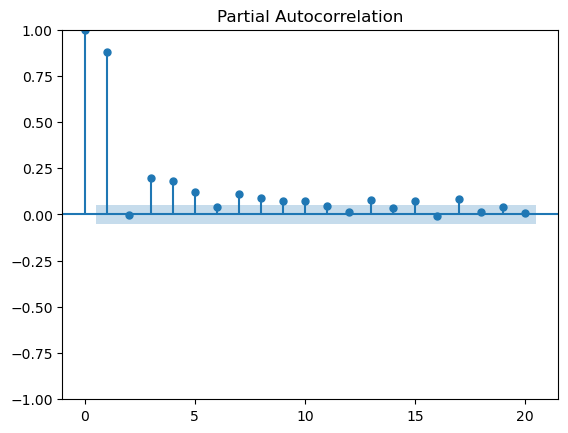

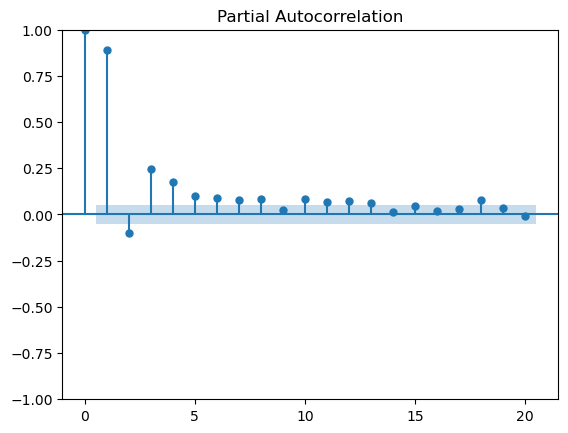

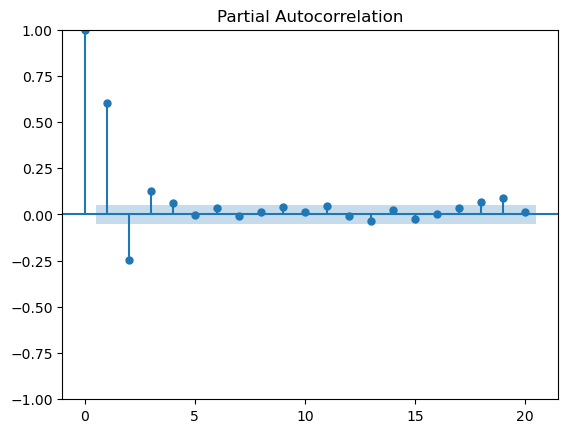

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf


# Calculando y graficando Temp_max
plot_pacf(data['Temp_max'], lags=20, method='ywm')
plt.show()

# Calculando y graficando Temp_min
plot_pacf(data['Temp_min'], lags=20, method='ywm')
plt.show()

# Calculando y graficando Hum_avg
plot_pacf(data['Hum_avg'], lags=20, method='ywm')
plt.show()

In [12]:
import pandas as pd


# Crear lags para las variables
for var in ['Temp_max', 'Temp_min', 'Hum_avg']:
    for lag in [1, 2]:
        data[f'{var}_lag{lag}'] = data[var].shift(lag)


# establecer fecha corte
fecha_corte = pd.to_datetime('2022-01-01')
train_data = data[data['ds'] < fecha_corte]
test_data = data[data['ds'] >= fecha_corte]

# omitir filas nan
train_data = train_data.dropna()
test_data = test_data.dropna()

# Imputa los valores nulos para cada columna de lag usando la media de la columna correspondiente
for var in ['Temp_max', 'Temp_min', 'Hum_avg']:
    for lag in [1, 2]:
        lag_column = f'{var}_lag{lag}'
        if data[lag_column].isna().any():  # Verifica si hay NaN en la columna
            mean_value = data[var].mean()  # Calcula la media de la variable original, no del lag
            data.loc[:, lag_column] = data[lag_column].fillna(mean_value)  # Modificación sugerida para evitar la advertencia









## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''
  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)
      
      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [ ]:
#CODIGO AQUI

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [ ]:
#!pip install surprise

In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [13]:


# Cargar los datos
data = pd.read_csv('cervezas.csv')

# Muestra las primeras filas del dataset
print(data.head())

# Verifica la presencia de valores nulos, no hay nulos 
print("\nValores nulos en el dataset:")
print(data.isnull().sum())

# Cuenta cuántas cervezas únicas se están evaluando
unique_beers = data['beerId'].nunique()
print("\nNúmero de cervezas únicas evaluadas:", unique_beers)

# Cuenta cuántos ciudadanos participaron en la evaluación
unique_users = data['userId'].nunique()
print("\nNúmero de ciudadanos que participaron en la evaluación:", unique_users)


   userId  beerId  rating                            beerName  \
0     144     995     3.0                            Mai Bock   
1      63   58695     4.0  Hop In The Dark Cascadian Dark Ale   
2     147    4083     5.0                 Stone Ruination IPA   
3    4261   40310     3.0                     Noël Des Géants   
4     140    1904     5.0       Sierra Nevada Celebration Ale   

                        beerStyle  
0           Maibock / Helles Bock  
1              American Black Ale  
2  American Double / Imperial IPA  
3            Herbed / Spiced Beer  
4                    American IPA  

Valores nulos en el dataset:
userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64

Número de cervezas únicas evaluadas: 3747

Número de ciudadanos que participaron en la evaluación: 706


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [16]:
# Contar los productos únicos
num_products = data['beerId'].nunique()
print(f"Productos únicos: {num_products}")

# Contar las calificaciones
num_ratings = data['rating'].count()
print(f"Calificaciones totales: {num_ratings}")

# Calificaciones faltantes
missing_ratings = data['rating'].isnull().sum()
print(f"Calificaciones faltantes: {missing_ratings}")

# Media de las calificaciones
average_rating = data['rating'].mean()
print(f"Media de calificaciones: {average_rating:.2f}")




# Transformar los datos a una matriz usuario-producto
ratings_matrix = data.pivot_table(index='userId', columns='beerId', values='rating')

# Mostrar los resultados
print(ratings_matrix.head())


Productos únicos: 3747
Calificaciones totales: 295059
Calificaciones faltantes: 0
Media de calificaciones: 3.86
beerId  5         6         7         9         10        11        14     \
userId                                                                      
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       3.395  3.765217  3.256849  3.478261       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN  3.791908       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN  3.431818       NaN   
6         NaN       NaN       NaN       NaN       NaN       NaN  3.892157   

beerId  15     17     19     ...  74491  74530  74548  74579  74634  74827  \
userId                       ...                                             
1         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN    NaN    NaN  ...    

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Asegúrate de que los stopwords estén descargados
nltk.download('stopwords')


# Eliminar duplicados y seleccionar solo las columnas relevantes de cerveza
beer_data = data[['beerId', 'beerName', 'beerStyle']].drop_duplicates()

# Preparar el procesamiento de texto
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True, max_df=0.1)

# Aplicar Bag of Words en la columna 'beerStyle'
X = vectorizer.fit_transform(beer_data['beerStyle'])

# Crear un nuevo DataFrame con los resultados
feature_names = vectorizer.get_feature_names_out()
beer_style_bow = pd.DataFrame(X.toarray(), columns=feature_names)

beer_style_bow.sample(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,adjunct,alcohol,altbier,amber,ancient,apa,baltic,barleywine,beer,belgian,...,warmer,wee,weissbier,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
1551,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [32]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy  

# Carga y preparación de datos
data = pd.read_csv('cervezas.csv')
data = data[['userId', 'beerId', 'rating']]
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data, reader)

# División de los datos
trainset, testset = train_test_split(data_surprise, test_size=0.3, random_state=42)

# cong del modelo KNN basado en usuarios
sim_options_user = {'name': 'cosine', 'user_based': True}
algo_user = KNNBasic(sim_options=sim_options_user)
algo_user.fit(trainset)
predictions_user = algo_user.test(testset)
mae_user = accuracy.mae(predictions_user)

# cong del modelo KNN basado en productos
sim_options_item = {'name': 'cosine', 'user_based': False}
algo_item = KNNBasic(sim_options=sim_options_item)
algo_item.fit(trainset)
predictions_item = algo_item.test(testset)
mae_item = accuracy.mae(predictions_item)

# Imprimir los errores MAE para comparar
print("MAE del modelo basado en usuarios:", mae_user)
print("MAE del modelo basado en productos:", mae_item)



Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4639
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4640
MAE del modelo basado en usuarios: 0.46391403718672464
MAE del modelo basado en productos: 0.46397672493546066
    uid   iid  r_ui       est                                    details  \
0  1628  9755   4.5  4.200000  {'actual_k': 40, 'was_impossible': False}   
1   187   601   2.0  3.825000  {'actual_k': 40, 'was_impossible': False}   
2   112   409   3.0  3.862500  {'actual_k': 40, 'was_impossible': False}   
3   738  5051   4.0  4.000615  {'actual_k': 40, 'was_impossible': False}   
4   141  4394   4.0  3.887500  {'actual_k': 40, 'was_impossible': False}   

   error_abs  
0   0.300000  
1   1.825000  
2   0.862500  
3   0.000615  
4   0.112500  


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [34]:
from surprise import NMF, accuracy, SVD
import random
import numpy as np

data = pd.read_csv('cervezas.csv')
data = data[['userId', 'beerId', 'rating']]

reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data, reader)

# Fijar la semilla para reproducibilidad
random.seed(42)
np.random.seed(42)

# dividir los datos en conjunto de entrenamiento y de prueba
trainset, testset = train_test_split(data_surprise, test_size=0.3, random_state=42)

# Entrenar un modelo NMF
algo = NMF(n_factors=15, random_state=42)
algo.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = algo.test(testset)

# mae
mae = accuracy.mae(predictions)

# Mostrar las predicciones como DataFrame para análisis
predictions_df = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est, pred.details) for pred in predictions],
                              columns=['uid', 'iid', 'r_ui', 'est', 'details'])
predictions_df['error_abs'] = abs(predictions_df['r_ui'] - predictions_df['est'])
print(predictions_df.head())
print("MAE del modelo NMF:", mae)


# Entrenar un modelo SVD
algo = SVD(random_state=42)
algo.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = algo.test(testset)

# Calcular el MAE
mae = accuracy.mae(predictions)

# Mostrar las predicciones como DataFrame para análisis
predictions_df = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est, pred.details) for pred in predictions],
                              columns=['uid', 'iid', 'r_ui', 'est', 'details'])
predictions_df['error_abs'] = abs(predictions_df['r_ui'] - predictions_df['est'])

# Imprimir el MAE y mostrar las primeras filas del DataFrame
print("MAE del modelo SVD:", mae)
print(predictions_df.head())





MAE:  0.4826
    uid   iid  r_ui       est                    details  error_abs
0  1628  9755   4.5  3.682730  {'was_impossible': False}   0.817270
1   187   601   2.0  3.714152  {'was_impossible': False}   1.714152
2   112   409   3.0  3.973135  {'was_impossible': False}   0.973135
3   738  5051   4.0  3.767895  {'was_impossible': False}   0.232105
4   141  4394   4.0  3.910392  {'was_impossible': False}   0.089608
MAE del modelo NMF: 0.48259310524680443
MAE:  0.4610
MAE del modelo SVD: 0.4610339636110489
    uid   iid  r_ui       est                    details  error_abs
0  1628  9755   4.5  4.022229  {'was_impossible': False}   0.477771
1   187   601   2.0  3.807105  {'was_impossible': False}   1.807105
2   112   409   3.0  3.885699  {'was_impossible': False}   0.885699
3   738  5051   4.0  4.014968  {'was_impossible': False}   0.014968
4   141  4394   4.0  3.926274  {'was_impossible': False}   0.073726


5. Observamos que el modelo SVD tiene un mae(Mean Absolute Error) ligeramente mejor que NMF, esto quiere decirq ue la predicciones de SVD son mas precisas.Esto lo convierte en el mejor candidato para un sistema de recomendacion.




## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [37]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [38]:
from collections import defaultdict

def get_top_n(predictions, n=3):
    """Devuelve las N mejores recomendaciones para cada usuario del conjunto de predicciones."""
    
    # Mapear las predicciones para cada usuario.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Ordenar las predicciones para cada usuario y devolver las N más altas.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Supongamos que 'predictions' ya están definidas como en los ejemplos anteriores
top_n = get_top_n(predictions, n=3)

# Mostrar las top 3 recomendaciones para el usuario 100
if 100 in top_n:
    print(f"Top 3 recomendaciones para el usuario 100: {top_n[100]}")
else:
    print("No se encontraron recomendaciones para el usuario 100.")


import random

# Identificar cervezas que Homer no ha calificado
cervezas_evaluadas = set(data[data['userId'] == 100]['beerId'])
todas_cervezas = set(data['beerId'])
cervezas_no_evaluadas = list(todas_cervezas - cervezas_evaluadas)

# Seleccionar aleatoriamente 5 cervezas no evaluadas
cervezas_a_evaluar = random.sample(cervezas_no_evaluadas, 5)

# Realizar predicciones para estas cervezas
predicciones_cervezas = [algo.predict(100, iid) for iid in cervezas_a_evaluar]
for pred in predicciones_cervezas:
    print(f"Predicción para cerveza {pred.iid}: {pred.est:.2f}")


# Usar la función precision_recall_at_k() en las predicciones del modelo
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)

# Calcular el promedio de precisión y recall
average_precision = sum(precisions.values()) / len(precisions)
average_recall = sum(recalls.values()) / len(recalls)

print(f"Promedio de Precisión: {average_precision:.3f}")
print(f"Promedio de Recall: {average_recall:.3f}")


Top 3 recomendaciones para el usuario 100: [(325, 3.941802288645008), (325, 3.941802288645008), (325, 3.941802288645008)]
Predicción para cerveza 1445: 3.79
Predicción para cerveza 1305: 3.74
Predicción para cerveza 8958: 3.81
Predicción para cerveza 22478: 3.51
Predicción para cerveza 601: 3.85
Promedio de Precisión: 0.743
Promedio de Recall: 0.340


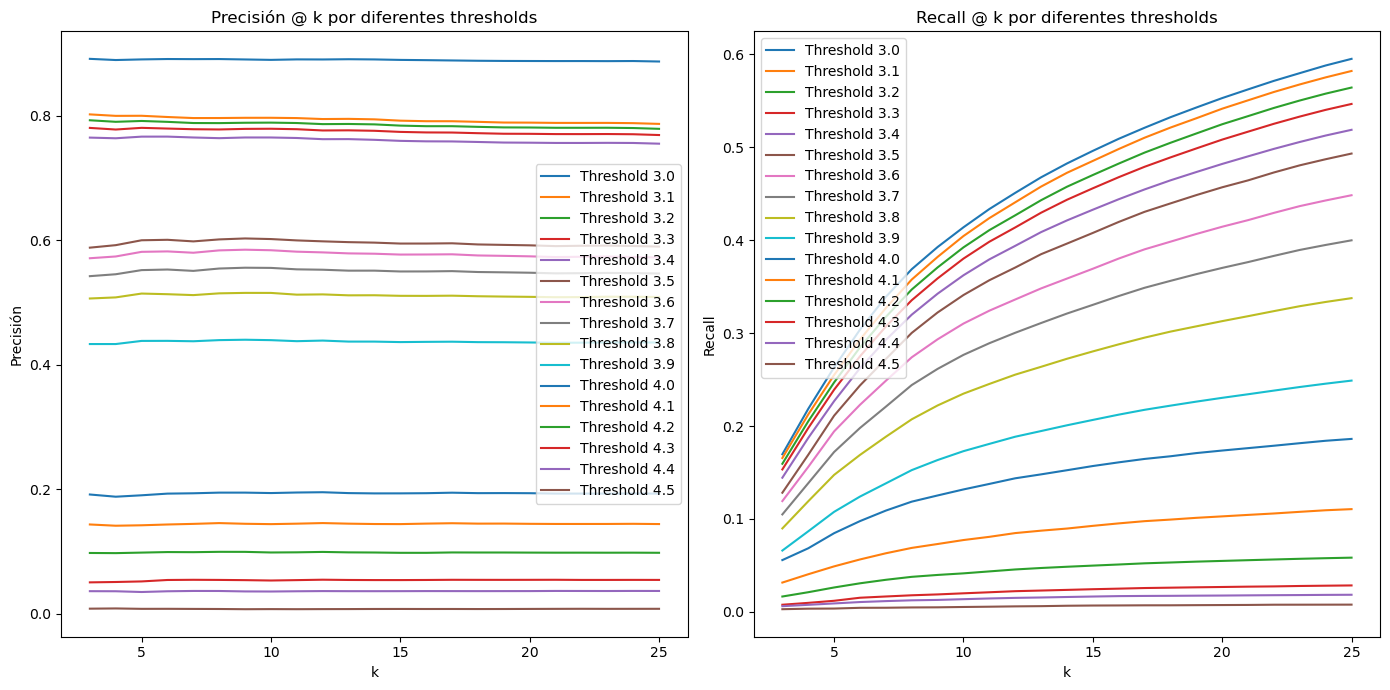

In [39]:
import matplotlib.pyplot as plt

# Definimos rangos para k y threshold
k_values = range(3, 26)  # k desde 3 hasta 25
thresholds = np.arange(3.0, 4.6, 0.1)  # threshold desde 3.0 hasta 4.5

# Diccionarios para almacenar los resultados
precision_results = {th: [] for th in thresholds}
recall_results = {th: [] for th in thresholds}

# Calcular precisión y recall para cada combinación de k y threshold
for th in thresholds:
    precisions_th, recalls_th = [], []
    for k in k_values:
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=th)
        avg_precision = np.mean(list(precisions.values()))
        avg_recall = np.mean(list(recalls.values()))
        precisions_th.append(avg_precision)
        recalls_th.append(avg_recall)
    precision_results[th] = precisions_th
    recall_results[th] = recalls_th

# Gráficos de precisión y recall por k para diferentes thresholds
plt.figure(figsize=(14, 7))

# Precisión
plt.subplot(1, 2, 1)
for th, values in precision_results.items():
    plt.plot(k_values, values, label=f'Threshold {th:.1f}')
plt.title('Precisión @ k por diferentes thresholds')
plt.xlabel('k')
plt.ylabel('Precisión')
plt.legend()

# Recall
plt.subplot(1, 2, 2)
for th, values in recall_results.items():
    plt.plot(k_values, values, label=f'Threshold {th:.1f}')
plt.title('Recall @ k por diferentes thresholds')
plt.xlabel('k')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:

# Mapear los ID de usuarios y cervezas a índices continuos
user_ids = data['userId'].unique()
beer_ids = data['beerId'].unique()
user_to_index = {user_id: idx for idx, user_id in enumerate(user_ids)}
beer_to_index = {beer_id: idx for idx, beer_id in enumerate(beer_ids)}

# Inicializar la matriz con ceros
num_users = len(user_ids)
num_beers = len(beer_ids)
full_matrix = np.zeros((num_users, num_beers))

# Llenar la matriz con las predicciones del modelo
for user_id in user_ids:
    for beer_id in beer_ids:
        prediction = algo.predict(user_id, beer_id)
        full_matrix[user_to_index[user_id], beer_to_index[beer_id]] = prediction.est

# Convertir la matriz a DataFrame para una mejor visualización
full_matrix_df = pd.DataFrame(full_matrix, index=user_ids, columns=beer_ids)
print(full_matrix_df.head())


         995       58695     4083      40310     1904      409       16858  \
144   3.871513  3.622858  3.842587  3.636771  3.919137  3.754595  3.686757   
63    4.131842  4.034455  4.233354  4.016627  4.262557  4.097508  4.041871   
147   3.979455  3.897711  4.086853  3.851518  4.112932  3.953385  3.885829   
4261  3.874472  3.820959  3.948819  3.655140  4.013410  3.713958  3.734862   
140   4.044295  3.965228  4.141565  3.924157  4.173485  4.014227  3.953092   

         25061     14309     13906  ...     1145      708       45308  \
144   3.706330  3.722344  3.778792  ...  3.657975  3.769330  3.695747   
63    4.018054  3.997604  4.119530  ...  3.955044  4.137833  4.080694   
147   3.867270  3.852832  3.949128  ...  3.797175  3.995989  3.943278   
4261  3.843192  3.710188  3.799044  ...  3.573084  3.878221  3.733281   
140   3.921410  3.919040  4.011564  ...  3.856818  4.048115  3.994935   

         25095     4957      47589     62792     18432     4753      6428   
144   3.729386 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
